In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_excel("Lab Session1 Data.xlsx")
data

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs),High Value Tx,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Candy,Mango,Milk
0,C_1,20,6,2,386,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,55.0,18.0
1,C_2,16,3,6,289,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C_3,27,6,2,393,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C_4,19,1,2,110,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C_5,24,4,2,280,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,C_6,22,1,5,167,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,C_7,15,4,2,271,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,C_8,18,4,2,274,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,C_9,21,1,4,148,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,C_10,16,2,4,198,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data = data.iloc[:, 0:6]
data

,Customer,Candies (#),Mangoes (Kg),Milk Packets (#),Payment (Rs),High Value Tx
0,C_1,20,6,2,386,Yes
1,C_2,16,3,6,289,Yes
2,C_3,27,6,2,393,Yes
3,C_4,19,1,2,110,No
4,C_5,24,4,2,280,Yes
5,C_6,22,1,5,167,No
6,C_7,15,4,2,271,Yes
7,C_8,18,4,2,274,Yes
8,C_9,21,1,4,148,No
9,C_10,16,2,4,198,No


# A5

In [4]:
d = data.iloc[:, 1:5]
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

labels = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])
perceptron = Perceptron(max_iter=1000, random_state=0)
perceptron.fit(d, labels)
predictions = perceptron.predict(d)

accuracy = accuracy_score(labels, predictions)
print("Model Accuracy:", accuracy)

new_data = np.array([
    [17, 3, 3, 250],
    [23, 5, 1, 320]
])

new_predictions = perceptron.predict(new_data)
print("New Data Predictions:", new_predictions)

Model Accuracy: 0.9
New Data Predictions: [1 1]


C:\Users\roosh\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


# A6

In [5]:
labels = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])
d = np.array(d, dtype = float)
data_pseudo_inv = np.linalg.pinv(d)
weights = np.dot(data_pseudo_inv, labels)

def predict_with_weights(data_point, weights):
    activation = np.dot(data_point, weights)
    return 1 if activation >= 0 else 0

predictions = [predict_with_weights(data_point, weights) for data_point in d]
accuracy = np.mean(predictions == labels)

print("Model Accuracy (Pseudo-Inverse):", accuracy)
new_data = np.array([
    [17, 3, 3, 1],  
    [23, 5, 1, 1]
], dtype = float)

new_predictions = [predict_with_weights(data_point, weights) for data_point in new_data]
print("New Data Predictions (Pseudo-Inverse):", new_predictions)


Model Accuracy (Pseudo-Inverse): 0.7
New Data Predictions (Pseudo-Inverse): [0, 0]


# A7

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_der(x):
    return x * (1 - x)

learning_rate = 0.05

inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([[0], [0], [0], [1]])

ip_n = 2
hn_n = 4
op_n = 1

itrns = 1000
np.random.seed(0)
weights_ip_hn = np.random.uniform(size=(ip_n, hn_n))
biases_hn = np.random.uniform(size=(1, hn_n))
weights_hn_op = np.random.uniform(size=(hn_n, op_n))
biases_op = np.random.uniform(size=(1, op_n))

for i in range(itrns):
    hn_l_ip = np.dot(inputs, weights_ip_hn) + biases_hn  
    hn_l_op = sigmoid(hn_l_ip)  
    op_l_ip = np.dot(hn_l_op, weights_hn_op) + biases_op  
    op_l_op = sigmoid(op_l_ip)
    
    error = targets - op_l_op  
   
    if np.max(np.abs(error)) <= 0.002:
        print(f"Converged at iteration {i}")
        break
   
    delta_op = error * sigmoid_der(op_l_op)
    error_hn = delta_op.dot(weights_hn_op.T)
    delta_hn = error_hn * sigmoid_der(hn_l_op)
    
    weights_hn_op += hn_l_op.T.dot(delta_op) * learning_rate
    biases_op += np.sum(delta_op, axis=0, keepdims=True) * learning_rate
    weights_ip_hn += inputs.T.dot(delta_hn) * learning_rate
    biases_hn += np.sum(delta_hn, axis=0, keepdims=True) * learning_rate

predicted_output = op_l_op.round()
print("Predicted Output:")
print(predicted_output)


Predicted Output:
[[0.]
 [0.]
 [0.]
 [0.]]


# A8

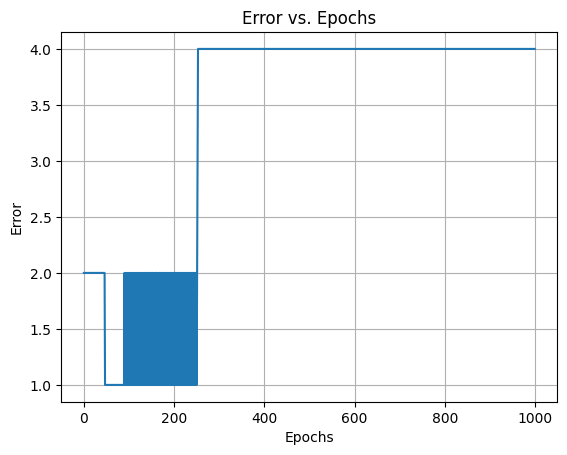

Learned Weights:
[ 0.1 -0.1 -0.1]


In [7]:
import numpy as np
import matplotlib.pyplot as plt

W = np.array([10, 0.2, -0.75])
learning_rate = 0.05

ip = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
tgts = np.array([0, 1, 1, 0])

def bin_step(x):
    return 1 if x >= 0 else 0

def sum_sq_error(pred, tgts):
    return np.sum((pred - tgts) ** 2)

error_val = []
epochs = []

max_epochs = 1000
convergence_error = 0.002

for epoch in range(max_epochs):
    total_error = 0
    for i in range(len(ip)):
        ip_data = np.insert(ip[i], 0, 1)  
        net = np.dot(ip_data, W)
        pred = bin_step(net)
        error = tgts[i] - pred
        total_error += error ** 2
        W += learning_rate * error * ip_data
    error_val.append(total_error)
    epochs.append(epoch)

    if total_error <= convergence_error:
        print(f"Converged at epoch {epoch}")
        break

plt.plot(epochs, error_val)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Error vs. Epochs')
plt.grid()
plt.show()

print("Learned Weights:")
print(W)